In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('s3://germancredit2/datos/original/german_credit_data.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:

df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:

df["Risk"].value_counts()/df["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [7]:

train,test = train_test_split(df,test_size = 0.3,random_state = 42 ,stratify = df["Risk"])

In [8]:

train["Risk"].value_counts()/train["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [9]:

test["Risk"].value_counts()/test["Risk"].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [10]:

train.to_csv("s3://germancreditdata5/Datos/Train/train.csv",index = False)

In [11]:

test.to_csv("s3://germancreditdata5/Datos/Test/test.csv",index = False)

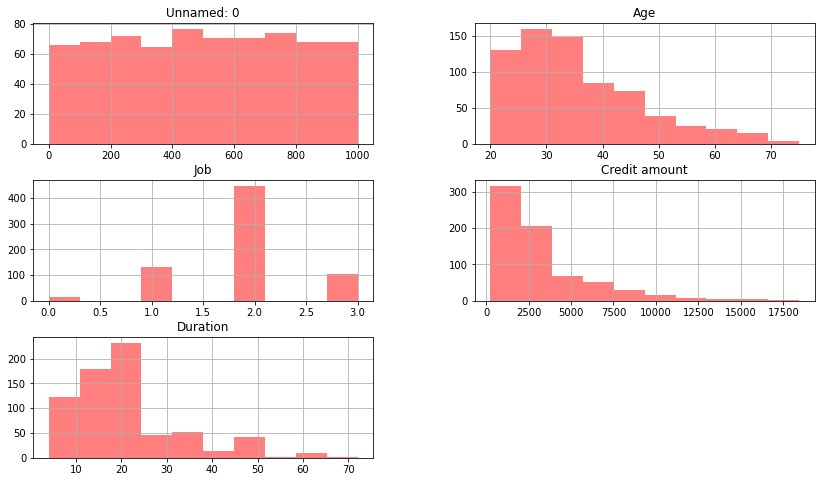

In [12]:

train.hist(figsize=(14,8),alpha=0.5,color='r')
plt.show()

Minimum:250.00
Mean:3236.12
Median:2290.00
Mode:1478.00
Maximum:18424.00



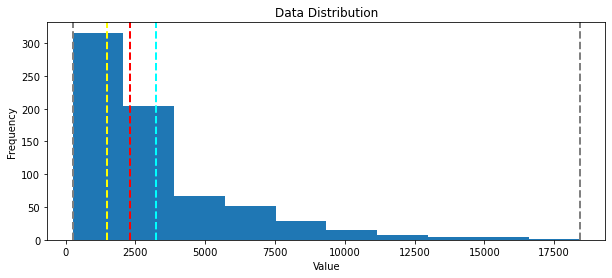

In [13]:
# Get the variable to examine
var = train['Credit amount']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

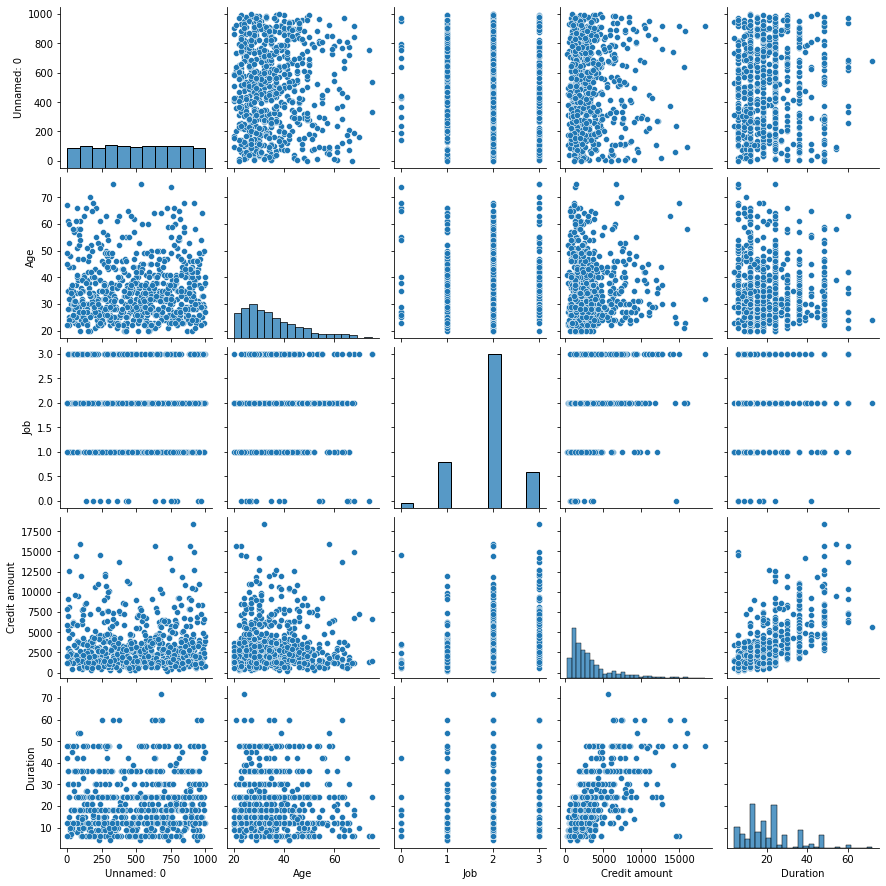

In [14]:

import seaborn as sns
sns.pairplot(train)

Minimum:250.00
Mean:3236.12
Median:2290.00
Mode:1478.00
Maximum:18424.00



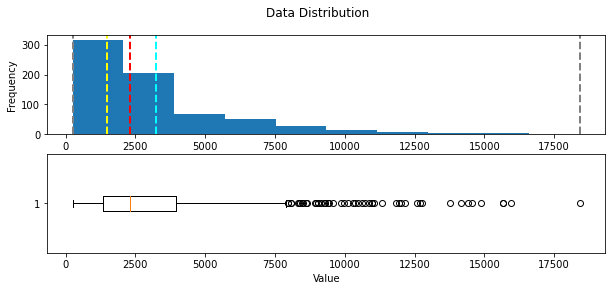

In [15]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = train['Credit amount']
# Call the function
show_distribution(col)

In [16]:

pd.crosstab(index = train['Housing'],columns = train['Risk'],margins = True)

Risk,bad,good,All
Housing,,,
free,29,45,74
own,133,371,504
rent,48,74,122
All,210,490,700


In [17]:
tabla_sex = pd.crosstab(index = train['Sex'],columns = train['Risk'],margins = True)

In [18]:

from sklearn.impute import SimpleImputer

In [19]:

X_train = train[['Age','Credit amount','Duration']]

In [20]:

imputer = SimpleImputer(strategy = 'mean')

In [21]:

imputer.fit(X_train)

SimpleImputer()

In [22]:

imputer.statistics_


array([  35.40285714, 3236.12142857,   21.04857143])

In [23]:

imputer.transform([[21,1000,np.nan],
                  [np.nan,np.nan,12]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[  21.        , 1000.        ,   21.04857143],
       [  35.40285714, 3236.12142857,   12.        ]])

In [24]:

imputer.fit_transform(X_train)

array([[3.100e+01, 4.473e+03, 3.600e+01],
       [4.600e+01, 1.829e+03, 1.500e+01],
       [2.700e+01, 7.418e+03, 6.000e+01],
       ...,
       [6.300e+01, 1.655e+03, 1.200e+01],
       [4.900e+01, 2.096e+03, 1.200e+01],
       [3.700e+01, 3.676e+03, 6.000e+00]])

In [25]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 328 to 617
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        700 non-null    int64 
 1   Age               700 non-null    int64 
 2   Sex               700 non-null    object
 3   Job               700 non-null    int64 
 4   Housing           700 non-null    object
 5   Saving accounts   575 non-null    object
 6   Checking account  426 non-null    object
 7   Credit amount     700 non-null    int64 
 8   Duration          700 non-null    int64 
 9   Purpose           700 non-null    object
 10  Risk              700 non-null    object
dtypes: int64(5), object(6)
memory usage: 81.8+ KB


In [26]:

X_train = train[['Saving accounts','Checking account']]
imputer = SimpleImputer(strategy = 'most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = ['Saving accounts','Checking account'])

In [27]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Saving accounts   700 non-null    object
 1   Checking account  700 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


In [28]:

from sklearn.impute import KNNImputer

In [29]:
dex = [[40,19,3.0],
      [42,20,3.1],
      [44,21,np.nan],
      [45,23,4.1],
      [39,25,5.0],
      [80,27,np.nan],
      [82,30,4.8]
      ]

In [30]:

imputer = KNNImputer(n_neighbors=2)

In [31]:

dex = pd.DataFrame(imputer.fit_transform(dex))

In [32]:

dex

,0,1,2
0,40.0,19.0,3.00
1,42.0,20.0,3.10
2,44.0,21.0,3.60
3,45.0,23.0,4.10
4,39.0,25.0,5.00
5,80.0,27.0,4.45
6,82.0,30.0,4.80


In [33]:

from sklearn.preprocessing import StandardScaler , RobustScaler

In [34]:
X_train = train[['Age']]
scaler = StandardScaler()
Standard_scaler = scaler.fit(X_train[['Age']])

In [35]:

scaler.mean_

array([35.40285714])

In [36]:

scaler.var_**0.5

array([11.23479253])

In [37]:

 scl = scaler.transform(X_train[['Age']])

In [38]:
q1 = X_train["Age"].quantile(0.25)
q3 = X_train["Age"].quantile(0.75)
iqr = q3 -q1

In [39]:
iqr

14.25

In [40]:

RobustScaler = (X_train['Age']-X_train['Age'].median())/iqr

In [41]:

RobustScaler

328   -0.140351
891    0.912281
255   -0.421053
243   -0.421053
492   -0.421053
         ...   
73     0.561404
401   -0.350877
769    2.105263
2      1.122807
617    0.280702
Name: Age, Length: 700, dtype: float64

In [42]:

from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
Robust_scaler = rbs.fit(X_train[['Age']])

SyntaxError: invalid syntax (2697051724.py, line 1)

In [45]:

from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(sparse = False,drop='first')
encoder.fit_transform(train[["Sex"]]);

In [47]:

encoder.categories_

[array(['female', 'male'], dtype=object)]

In [48]:
encoder.inverse_transform([[0]])

array([['female']], dtype=object)

In [49]:

encoder.inverse_transform([[1]])

array([['male']], dtype=object)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [51]:
numeric_pipeline = Pipeline(
    [
     ('Imputacion con la media', SimpleImputer(strategy = 'mean')),
     ('Escalado minmax',MinMaxScaler())
        
    ]
)

In [52]:

numeric_pipeline.fit(train[["Age","Credit amount","Duration"]])

Pipeline(steps=[('Imputacion con la media', SimpleImputer()),
                ('Escalado minmax', MinMaxScaler())])

In [53]:

numeric_pipeline[0].statistics_

array([  35.40285714, 3236.12142857,   21.04857143])

In [54]:

numeric_pipeline[1].min_

array([-0.36363636, -0.01375592, -0.05882353])

In [55]:
numeric_pipeline[1].min_

array([-0.36363636, -0.01375592, -0.05882353])

In [56]:

numeric_pipeline[1].data_max_

array([   75., 18424.,    72.])

In [57]:

numeric_pipeline.transform(train[["Age","Credit amount","Duration"]])

array([[0.2       , 0.23236492, 0.47058824],
       [0.47272727, 0.08688236, 0.16176471],
       [0.12727273, 0.3944096 , 0.82352941],
       ...,
       [0.78181818, 0.07730824, 0.11764706],
       [0.52727273, 0.10157368, 0.11764706],
       [0.30909091, 0.18851106, 0.02941176]])

In [58]:

numeric_pipeline.transform([[np.nan,np.nan,np.nan]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.28005195, 0.16430733, 0.25071429]])

In [59]:

#Sex, Purpose,Categoric_python,Checking account

In [60]:

#Sex, Purpose,Categoric_python,Checking account
categorical_pipeline = Pipeline(
    [
     ('Imputacion con la moda', SimpleImputer(strategy = 'most_frequent')),
     ('Codificacion',OneHotEncoder(sparse = False,drop='first'))
        
    ]
)

In [61]:
categorical_pipeline.fit(train[["Sex","Purpose","Housing"]])

Pipeline(steps=[('Imputacion con la moda',
                 SimpleImputer(strategy='most_frequent')),
                ('Codificacion', OneHotEncoder(drop='first', sparse=False))])

In [62]:
categorical_pipeline[0].statistics_

array(['male', 'car', 'own'], dtype=object)

In [63]:
categorical_pipeline[1].categories_

[array(['female', 'male'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object),
 array(['free', 'own', 'rent'], dtype=object)]

In [64]:
categorical_pipeline.transform(train[["Sex","Purpose","Housing"]])

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [65]:
from sklearn.compose import ColumnTransformer

In [66]:
column_transformer = ColumnTransformer(
[
    ("numeric pipeline",numeric_pipeline,[0,1,2]),
    ("categorical pipeline",categorical_pipeline,[3,4,5])
]
)

In [67]:
column_transformer.fit(train[["Age","Credit amount","Duration","Sex","Purpose","Housing",]])

ColumnTransformer(transformers=[('numeric pipeline',
                                 Pipeline(steps=[('Imputacion con la media',
                                                  SimpleImputer()),
                                                 ('Escalado minmax',
                                                  MinMaxScaler())]),
                                 [0, 1, 2]),
                                ('categorical pipeline',
                                 Pipeline(steps=[('Imputacion con la moda',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Codificacion',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 [3, 4, 5])])

In [68]:
column_transformer.transform(train[["Age","Credit amount","Duration","Sex","Purpose","Housing",]])

array([[0.2       , 0.23236492, 0.47058824, ..., 0.        , 1.        ,
        0.        ],
       [0.47272727, 0.08688236, 0.16176471, ..., 0.        , 1.        ,
        0.        ],
       [0.12727273, 0.3944096 , 0.82352941, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.78181818, 0.07730824, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.52727273, 0.10157368, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.30909091, 0.18851106, 0.02941176, ..., 0.        , 0.        ,
        1.        ]])

In [69]:
import joblib

In [70]:
joblib.dump(column_transformer,"preprocessing.joblib")

['preprocessing.joblib']

In [71]:
# EVALUACION DE MODELOS DE VALIDACION CRUZADA 

In [72]:
### vERSION 1 ,evaluar solo el modelo

In [74]:
X_train = train[["Age","Credit amount","Duration","Sex","Purpose","Housing",]] 

In [75]:
y_train = train["Risk"]

In [77]:
X_train_processed = column_transformer.transform(X_train)

In [78]:
X_train_processed

array([[0.2       , 0.23236492, 0.47058824, ..., 0.        , 1.        ,
        0.        ],
       [0.47272727, 0.08688236, 0.16176471, ..., 0.        , 1.        ,
        0.        ],
       [0.12727273, 0.3944096 , 0.82352941, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.78181818, 0.07730824, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.52727273, 0.10157368, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.30909091, 0.18851106, 0.02941176, ..., 0.        , 0.        ,
        1.        ]])

In [82]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [91]:
y_train_transform = (y_train=='good').astype('int')

In [93]:
results = cross_validate(DecisionTreeClassifier(),X_train_processed,y_train_transform,cv=10,scoring=["accuracy","f1"])

In [95]:
results.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1'])

In [96]:
print(results["test_accuracy"].mean(),"+-",results["test_accuracy"].std())

0.6214285714285713 +- 0.0448352995042149


In [ ]:
### VERSION 2  evaluar el preprocesamiento inclutyendolo en el pipeline 

In [97]:
final_pipeline = Pipeline(
[
    ("Pipeline de preprocesamiento",column_transformer),
    ("Modelo de predicción (Arbol)", DecisionTreeClassifier())
]
)


In [101]:
results = cross_validate(final_pipeline,X_train,y_train_transform,cv=10,scoring=["accuracy","f1"])

In [102]:
print(results["test_accuracy"].mean(),"+-",results["test_accuracy"].std())

0.6214285714285714 +- 0.04201554619957927


In [119]:
final_pipeline = Pipeline(
[
    ("Pipeline de preprocesamiento",column_transformer),
    ("Modelo de predicción (Arbol)", DecisionTreeClassifier(max_depth=3))
]
)
results = cross_validate(final_pipeline,X_train,y_train_transform,cv=10,scoring=["accuracy","f1"])

In [120]:
print(results["test_accuracy"].mean(),"+-",results["test_accuracy"].std())

0.7214285714285713 +- 0.01317077779613268


In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
grid = {'max_depth':[2,3,5,10]}

In [145]:
grid_search = GridSearchCV(
DecisionTreeClassifier(),    
param_grid=grid,
cv=10,
scoring=["accuracy","f1"],
refit=False)

In [146]:
grid_search.fit(X_train_processed,y_train_transform)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10]}, refit=False,
             scoring=['accuracy', 'f1'])

In [159]:
grid_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10]}, refit=False,
             scoring=['accuracy', 'f1'])

In [158]:
grid_search.get_params_

AttributeError: 'GridSearchCV' object has no attribute 'get_params_'

In [151]:
grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'